In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

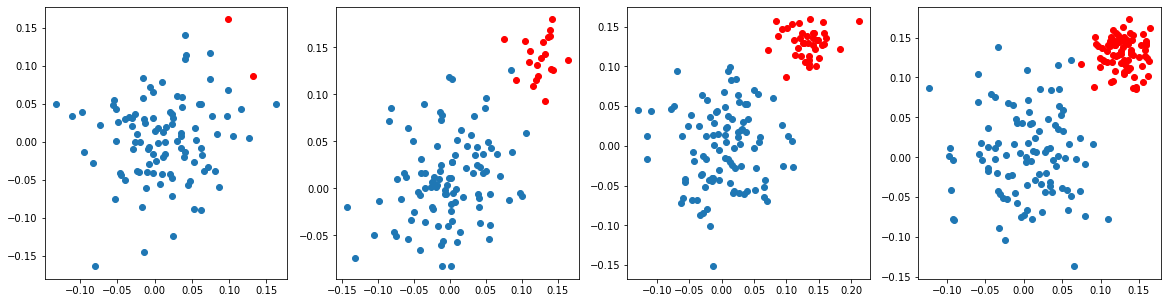

In [5]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    #Draw random samples from a normal (Gaussian) distribution
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    #print("X_p",X_p.shape)
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    #print("X_n",X_n.shape)
    y_p=np.array([1]*i[0]).reshape(-1,1)
    #print("y_p",y_p.shape)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    #print("y_n",y_n.shape)
    X=np.vstack((X_p,X_n))
    #print("X",X.shape)
    y=np.vstack((y_p,y_n))
    #print("Y",y.shape)
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

# Task1 

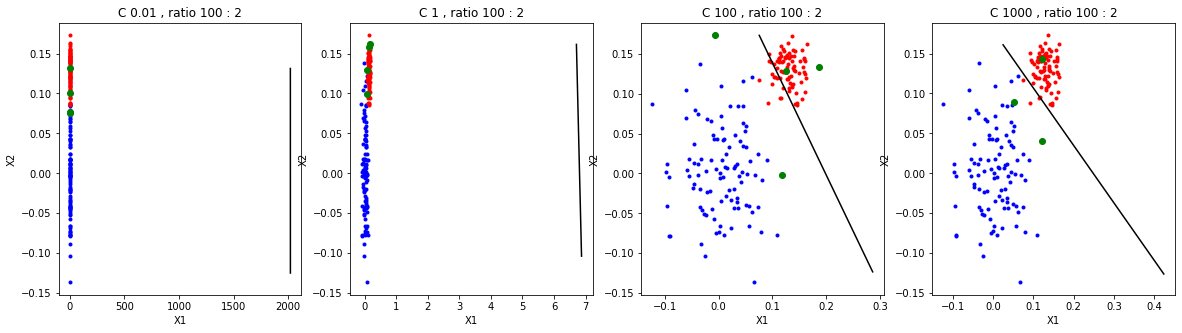

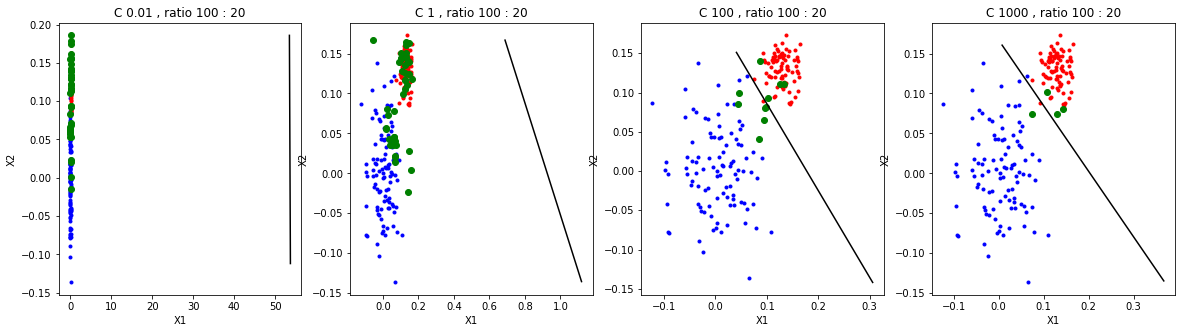

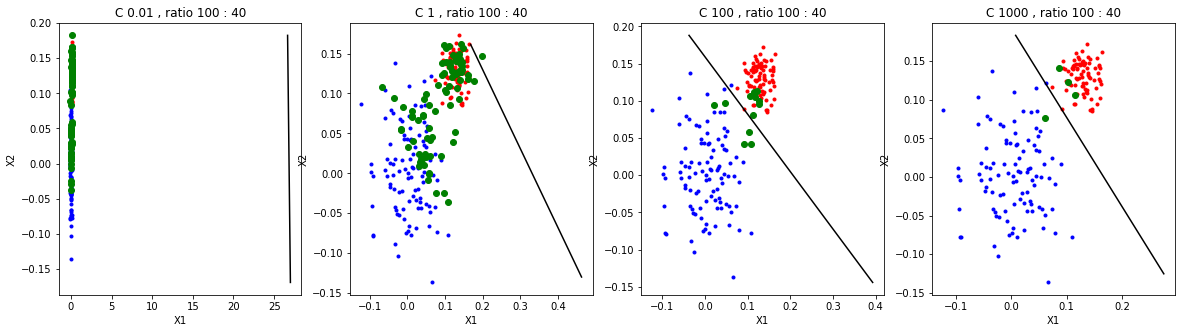

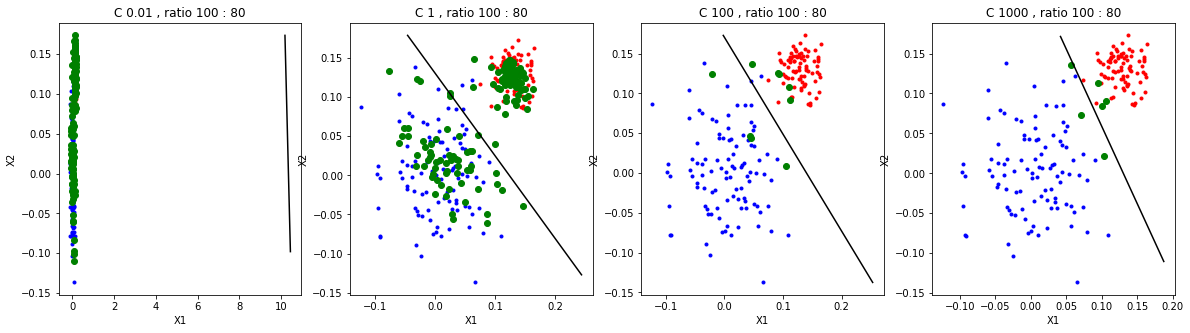

In [13]:
#you can start writing code here.

ratios = [(100,2),(100,20), (100,40),(100,80)]
C = [0.01,1,100,1000]

for idx,ratio in enumerate(ratios):
    
  # generate points
  plt.figure(figsize=(20,5))
  for id,c in enumerate(C) :
    plt.subplot(1,len(C),id+1)
    
    #Draw random samples from a normal (Gaussian) distribution
    xp = np.random.normal(0.0, 0.05, size=(ratio[0],2))
    xn = np.random.normal(0.13, 0.02, size=(ratio[1],2))
    
    # generate labels
    yp = np.array([1]*ratio[0]).reshape(-1,1)
    yn = np.array([0]*ratio[1]).reshape(-1,1)
    
    # build dataset
    X = np.vstack((xp,xn))
    Y = np.vstack((yp,yn))
    
    # run svm classfier
    svc_clf = SVC(C=c, kernel='linear')   # Defining Classifier for SVC
    svc_clf.fit(X,Y)                      # Applying SVC classifier
    coef=svc_clf.coef_[0]                 # Coefficients
    intercept=svc_clf.intercept_          #Intercepts

    postiveidx = ratio[0]-1
    negativeidx = ratio[0]
    plt.title(f'C {c} , ratio {ratio[0] } : {ratio[1]}')
    plt.scatter(X_p[:,0],X_p[:,1],marker='.',color='blue') # Scatter plot for positive labeled classes
    plt.scatter(X_n[:,0],X_n[:,1],marker='.',color='red') # Scatter plot for negative labeled classes
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    #To get the current Axes instance on the current figure matching the given keyword args, or create one
    # plt.scatter(X[negativeidx:,0], X[negativeidx:,1], color='red',cmap=plt.cm.Paired)
    ax = plt.gca()
    #Returns the axis limits 
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1])
    yy = np.linspace(ylim[0], ylim[1])
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
  

    mini,maxi=np.min(X[:,0]),np.max(X[:,1])                    #Defining range for Hyperplane
    points=np.array([[((-coef[1]*mini - intercept)/coef[0]), mini],[((-coef[1]*maxi - intercept)/coef[0]), maxi]])
    ax.plot(points[:,0],points[:,1],color='black')             #Drawing Hyperplane
    sup_vecs = svc_clf.support_vectors_
    ax.scatter(sup_vecs[:,0],sup_vecs[:,1],color="green")
    
    
  # plt.savefig()
  plt.show()

Observations on SVM:

1.We can see that the regularization hyperparameter (C) impacts the hyperplane separating the positive and negative class.

2.As C moves closer to 0, the model will underfit (high bias). In this case, since the points are linearly separated, it is better to figure out which bias-variance trade off that will work best for our model. 

3.When the dataset is extremely imbalanced then the change in learning rate does not classify data.
When the dataset is imbalanced, then the change in learning rate classfies the data very well.
When the dataset is highly balanced, then change in learning rate eventually classifies the datapoints very well, it includes some misclassified data-points.

4.As we can see from above plots, when C = 1000, the model perfectly separate the training data with some miss-classification. So, it does not guarantee that it will perfectly classify new unseen data.


## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

# Task 2

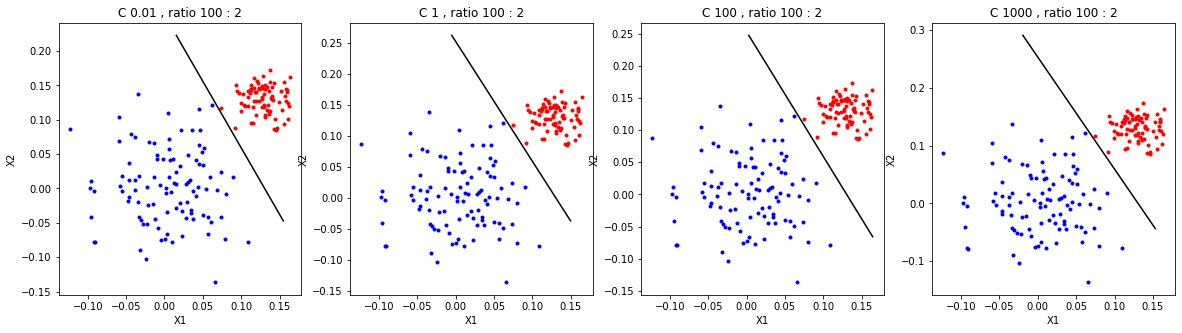

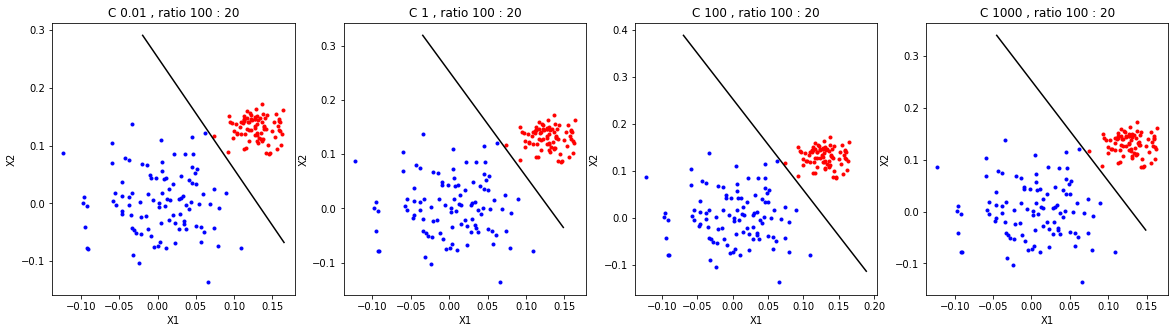

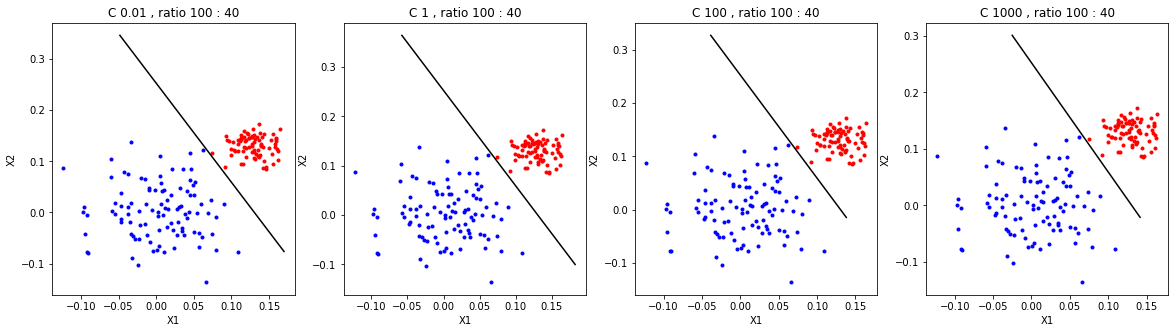

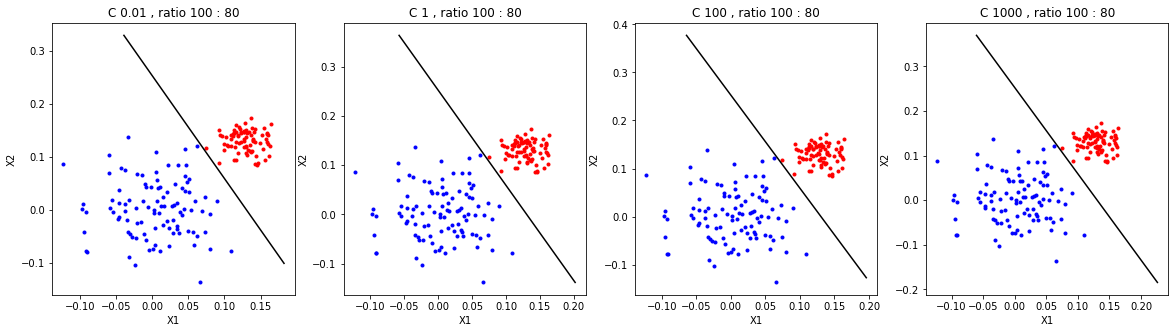

In [16]:
C = [0.01,1,100,1000]
ratios = [(100,2),(100,20), (100,40),(100,80)]

for idx,ratio in enumerate(ratios):
    
  # generate points
  plt.figure(figsize=(20,5))
  for id,c in enumerate(C) :
    plt.subplot(1,len(C),id+1)
    xp = np.random.normal(0.1, 0.06, size=(ratio[0],2))
    xn = np.random.normal(0.15, 0.09, size=(ratio[1],2))
    
    # generate labels
    yp = np.array([1]*ratio[0]).reshape(-1,1)
    yn = np.array([0]*ratio[1]).reshape(-1,1)
    
    # build dataset
    X = np.vstack((xp,xn))
    Y = np.vstack((yp,yn))
    
    #To get the current Axes instance on the current figure matching the given keyword args, or create one
    # plt.scatter(X[negativeidx:,0], X[negativeidx:,1], color='red',cmap=plt.cm.Paired)
    ax = plt.gca()
    #Returns the axis limits 
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1])
    yy = np.linspace(ylim[0], ylim[1])
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    # run Logistic Regression classfier
    logistic_clf = LogisticRegression(penalty='l2',C=c)
    logistic_clf.fit(X,Y)
    plt.title(f'C {c} , ratio {ratio[0] } : {ratio[1]}')
    plt.scatter(X_p[:,0],X_p[:,1],marker='.',color='blue') # Scatter plot for positive labeled classes
    plt.scatter(X_n[:,0],X_n[:,1],marker='.',color='red') # Scatter plot for negative labeled classes
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    mini,maxi=np.min(X[:,0]),np.max(X[:,1])                    #Defining range for Hyperplane
    points=np.array([[((-coef[1]*mini - intercept)/coef[0]), mini],[((-coef[1]*maxi - intercept)/coef[0]), maxi]])
    ax.plot(points[:,0],points[:,1],color='black')             #Drawing Hyperplane
    
    
  plt.show()
  

Observations on Logistic Regression:

Highly balanced dataset with change in learning parameters classify the the datapoints in balanced or effective manner.